In [27]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import random as rand

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
src_path = "../../src/"
sys.path.append(src_path)
import support_modeling as sp

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [28]:
df=pd.read_pickle("../../results/cluster_1.pkl")
df

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,...,Category_Office Supplies,Category_Technology,Ship Mode,Order Priority,Sales_robust,Quantity_robust,Discount_robust,Profit_robust,Shipping Cost_robust,clusters_kmeans
0,1,0,0,1,0,0,0,0,0,0,...,0,1,2,1,23.119863,2.000000,0.5,24.372049,41.788214,1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2,23.436346,1.000000,0.0,26.420044,40.079650,1
2,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,22.705522,0.666667,1.0,50.779083,39.587477,1
3,0,1,0,1,0,0,0,0,0,0,...,0,0,2,2,20.625843,0.666667,0.0,17.079876,38.108656,1
4,0,0,1,0,0,0,0,0,1,0,...,0,0,2,3,9.703682,1.333333,0.0,16.396488,36.942910,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19661,0,1,0,0,0,0,0,1,0,0,...,0,0,2,2,19.432030,0.666667,0.0,7.921195,0.197514,1
21510,0,1,0,0,0,0,0,0,0,1,...,0,1,2,1,21.415513,-0.333333,1.0,9.382697,0.114641,1
35970,1,0,0,1,0,0,0,0,0,0,...,1,0,2,1,7.972381,1.000000,0.0,22.406446,-0.224678,1
38169,1,0,0,0,0,0,0,1,0,0,...,0,1,2,1,7.832012,1.333333,0.0,8.464854,-0.251842,1


In [29]:
df2=pd.read_pickle("../../results/cluster_sinencod_1.pkl")
df2

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.9710,915.49,Medium,1
1,Standard Class,Consumer,APAC,Furniture,5244.840,6,0.0,996.4800,878.38,High,1
2,Standard Class,Corporate,US,Office Supplies,5083.960,5,0.2,1906.4850,867.69,Low,1
3,First Class,Corporate,APAC,Furniture,4626.150,5,0.0,647.5500,835.57,High,1
4,Same Day,Home Office,LATAM,Furniture,2221.800,7,0.0,622.0200,810.25,Critical,1
...,...,...,...,...,...,...,...,...,...,...,...
19661,First Class,Corporate,EU,Furniture,4363.350,5,0.0,305.4000,12.14,High,1
21510,First Class,Corporate,US,Technology,4799.984,2,0.2,359.9988,10.34,Medium,1
35970,Same Day,Consumer,APAC,Office Supplies,1840.680,6,0.0,846.5400,2.97,Medium,1
38169,First Class,Consumer,EU,Technology,1809.780,7,0.0,325.7100,2.38,Medium,1


In [30]:
df=df.drop(columns=["clusters_kmeans","Profit_robust"])

In [31]:
df["Sales_robust"]=df2["Sales"]

In [32]:
x=df.drop("Sales_robust",axis=1)
y=df[["Sales_robust"]]
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [33]:
model_LinearRegression=LinearRegression()
model_LinearRegression.fit(x_train,y_train)

LinearRegression()

In [34]:
print(y_train.dtypes)
print(y_test.dtypes)


Sales_robust    float64
dtype: object
Sales_robust    float64
dtype: object


In [35]:
y_test_pred=model_LinearRegression.predict(x_test)
y_train_pred=model_LinearRegression.predict(x_train)
sp.metricas(y_train,y_train_pred,y_test,y_test_pred)

,r2_score,MAE,MSE,RMSE
Train,0.499200,443.771500,397779.971300,630.698000
Test,0.425900,471.260300,456160.198000,675.396300
Diferencia Train-Test,0.073300,-27.488800,-58380.226700,-44.698300
Porcentaje diferencia (%),3.961700,-1.502100,-3.418300,-1.711100
Rango valores,5296.590000,5296.590000,5296.590000,5296.590000
Ratio Rango (%),0.008733,8.637933,8061.225895,12.329577
Influencia dif rango (%),0.001400,0.519000,1102.222900,0.843900
Media,1612.093400,1612.093400,1612.093400,1612.093400
Ratio Media(%),0.028693,28.380235,26485.443378,40.509263
Influencia dif media (%),0.004500,1.705200,3621.392300,2.772700


R² Score:

- Train (0.4992) y Test (0.4259) indican que el modelo explica alrededor del 42-50% de la varianza en los datos. Este ajuste es moderado, con una diferencia del 3.96%, lo que sugiere cierta consistencia entre ambos conjuntos.

MAE:

- El error absoluto promedio es de 443.77 (Train) y 471.26 (Test), con una diferencia del -1.5%. Esto indica que el modelo tiene un error promedio razonablemente constante entre los conjuntos.

MSE y RMSE:

- MSE y RMSE son altos (Test: 675.39 para RMSE), reflejando que los errores crecen significativamente al cuadrar las desviaciones. Aunque hay una diferencia del 3.42% (MSE) entre los conjuntos, esto es esperado en modelos con errores más grandes.

Relación con el Rango de Valores:

- El error relativo al rango de valores es bajo para el R² (0.0087%), pero muy alto para el MSE (8061.23%), lo que resalta que errores grandes tienen un impacto considerable en métricas cuadráticas

In [36]:
# Asegurarse de que las variables sean unidimensionales
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()
y_train = np.array(y_train).ravel()
y_train_pred = np.array(y_train_pred).ravel()

# Opcional: Convertir a series de Pandas
y_test = pd.Series(y_test)
y_test_pred = pd.Series(y_test_pred)
y_train = pd.Series(y_train)
y_train_pred = pd.Series(y_train_pred)

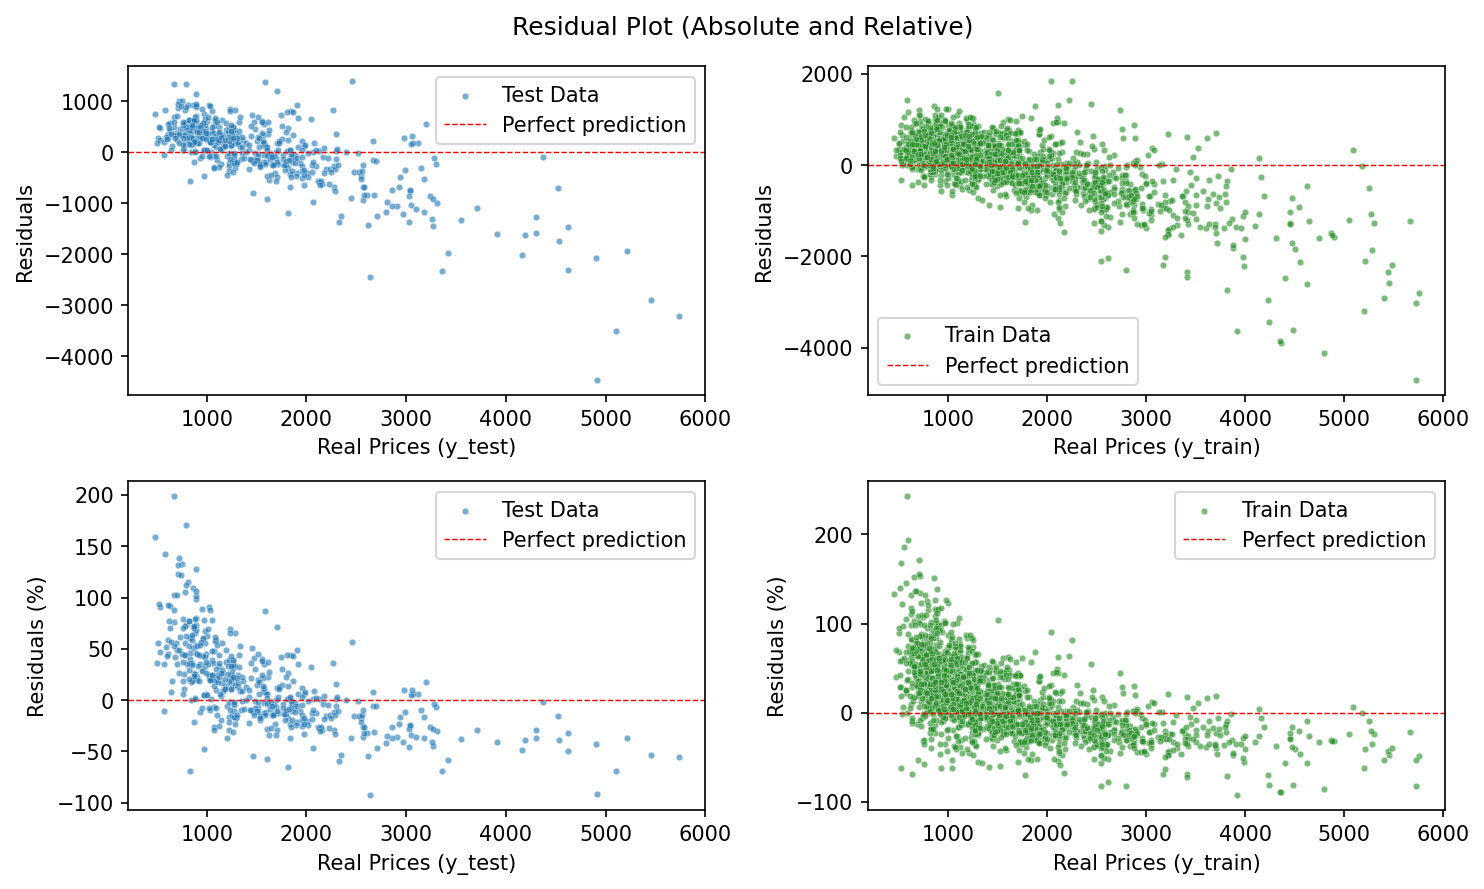

In [37]:
sp.plot_residuals(y_test, y_test_pred, y_train, y_train_pred)

El modelo tiene un buen desempeño en valores bajos y medios, pero sufre de subestimación en valores altos y errores relativos más significativos en valores pequeños. Aunque generaliza bien entre los conjuntos de entrenamiento y prueba, se recomienda explorar mejoras para manejar outliers y ajustar mejor los extremos, como el uso de transformaciones o modelos más robustos.

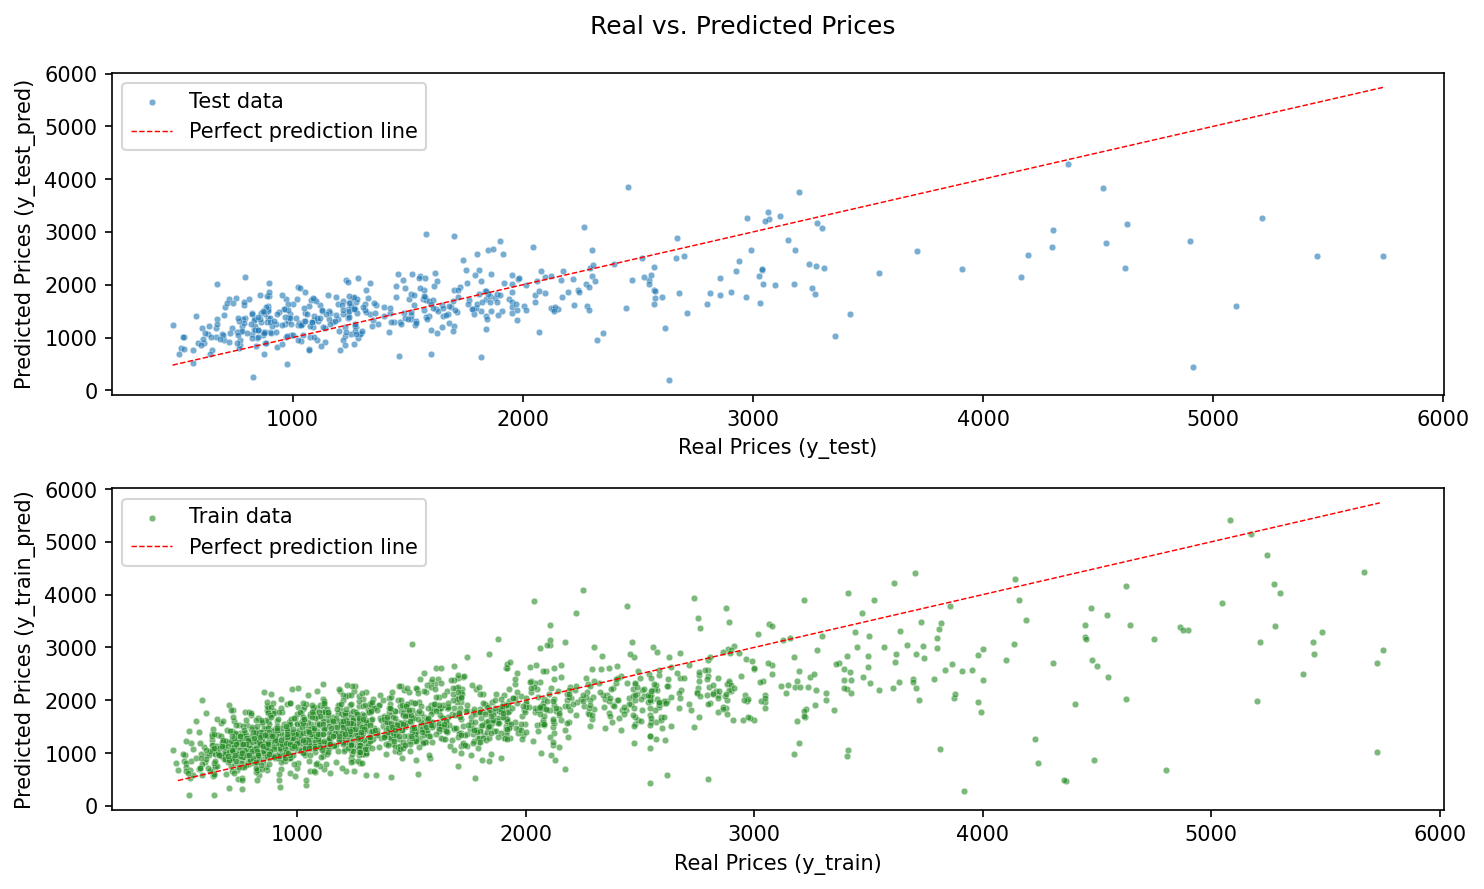

In [38]:
sp.plot_real_vs_predicted(y_test, y_test_pred, y_train, y_train_pred)

El modelo predice razonablemente bien los valores bajos y medios en ambos conjuntos (train y test), pero tiene dificultades para capturar con precisión los valores altos, que son subestimados de forma consistente.
Aunque no hay evidencia significativa de sobreajuste, el modelo podría beneficiarse de estrategias como el uso de transformaciones o algoritmos más robustos para manejar valores extremos y mejorar la precisión en predicciones de alto valor.

In [39]:
import pickle

# Guardar el modelo entrenado
with open('../../models/model_LinearRegression_cluster_1.pkl', 'wb') as file:
    pickle.dump(model_LinearRegression, file)